<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><li><span><a href="#Прогнозирование-заказов-такси" data-toc-modified-id="Прогнозирование-заказов-такси-1">Прогнозирование заказов такси</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасета-и-анализ-первичной-информации" data-toc-modified-id="Загрузка-датасета-и-анализ-первичной-информации-1.1.1">Загрузка датасета и анализ первичной информации</a></span></li><li><span><a href="#Приведение-данных-к-нужному-типу" data-toc-modified-id="Приведение-данных-к-нужному-типу-1.1.2">Приведение данных к нужному типу</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.3">Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1.2">Анализ</a></span><ul class="toc-item"><li><span><a href="#Ресэмплинг" data-toc-modified-id="Ресэмплинг-1.2.1">Ресэмплинг</a></span></li><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-1.2.2">Тренд и сезонность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.3">Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-1.3">Обучение</a></span><ul class="toc-item"><li><span><a href="#Проверка-качества-модели" data-toc-modified-id="Проверка-качества-модели-1.3.1">Проверка качества модели</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-1.3.2">Создание признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.3.3">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1.3.3.1">Линейная регрессия</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-1.3.3.2">Ridge</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-1.3.3.3">Lasso</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-1.3.3.4">ElasticNet</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-1.3.3.5">Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-1.3.3.6">Модель случайного леса</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-1.3.3.7">CatBoost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.4">Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-1.4">Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4.1">Вывод</a></span></li></ul></li><li><span><a href="#Основные-результаты" data-toc-modified-id="Основные-результаты-1.5">Основные результаты</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-1.6">Чек-лист проверки</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

Компания, оказывающая услуги такси, собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Требуется построить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Необходимо:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


## Подготовка данных

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета и анализ первичной информации

In [2]:
taxi = pd.read_csv('/datasets/taxi.csv')

Получение данных о первых пяти строках таблицы **taxi**:

In [3]:
taxi.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Общая информация о данных таблицы **taxi**:

In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


В датафрейме всего два столбца, содержащих информацию о количестве заказов такси в аэропорту в десятиминутные промежутки времени.

- **datetime** — начало временного интервала;
- **num_orders** — количество заказов.

Общее количество объектов - 26 496, пропусков нет.

Период, за который доступны данные:

In [5]:
print('Рассматриваемый период: с', pd.to_datetime(taxi['datetime'].min()), \
      'по', pd.to_datetime(taxi['datetime'].max()))

Рассматриваемый период: с 2018-03-01 00:00:00 по 2018-08-31 23:50:00


Таким образом, у нас есть история заказов за полгода.

---

Подготовим исходные данные для дальнейшего исследования и построения прогноза.

### Приведение данных к нужному типу

Приведем столбец с датой и временем к типу *datetime*:

In [6]:
taxi['datetime'] = pd.to_datetime(taxi['datetime'])

In [7]:
taxi.dtypes

datetime      datetime64[ns]
num_orders             int64
dtype: object

### Вывод

Датафрейм состоит всего из двух столбцов: начала временного интервала и количества заказов такси за каждые 10 минут. Данные предоставлены с марта по август 2018 г. Пропусков нет. Столбец **datetime** приведен к типу данных *datetime*.

## Анализ

Проанализируем предобработанные данные.

### Ресэмплинг

Установим индекс таблицы равным столбцу **datetime**:

In [8]:
taxi.set_index('datetime', inplace = True)

Убедимся, что данные расположены в хронологическом порядке:

In [9]:
taxi.sort_index(inplace = True)
print(taxi.index.is_monotonic)

True


Сделаем ресэмплинг данных с интервалом в один час:

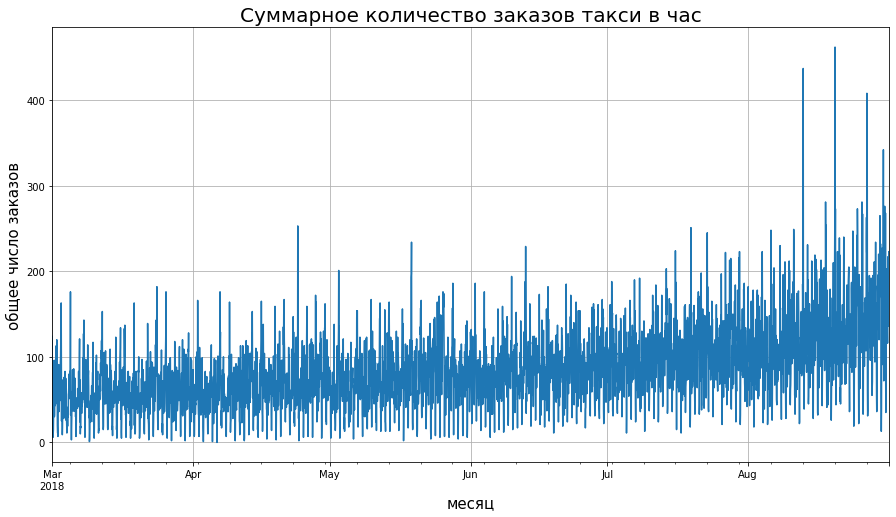

In [10]:
taxi = taxi.resample('1H').sum()
taxi.plot(grid = True, figsize = (15, 8), legend = False)
plt.title('Суммарное количество заказов такси в час', fontsize = 20)
plt.xlabel('месяц', fontsize = 15)
plt.ylabel('общее число заказов', fontsize = 15)
plt.show()

Начиная с июня число заказов такси в час начинает увеличиваться.

Сгладим колебания, построив скользящее среднее, где размер окна равен числу часов в сутках:

In [11]:
taxi['rolling_mean'] = taxi.rolling(24).mean()

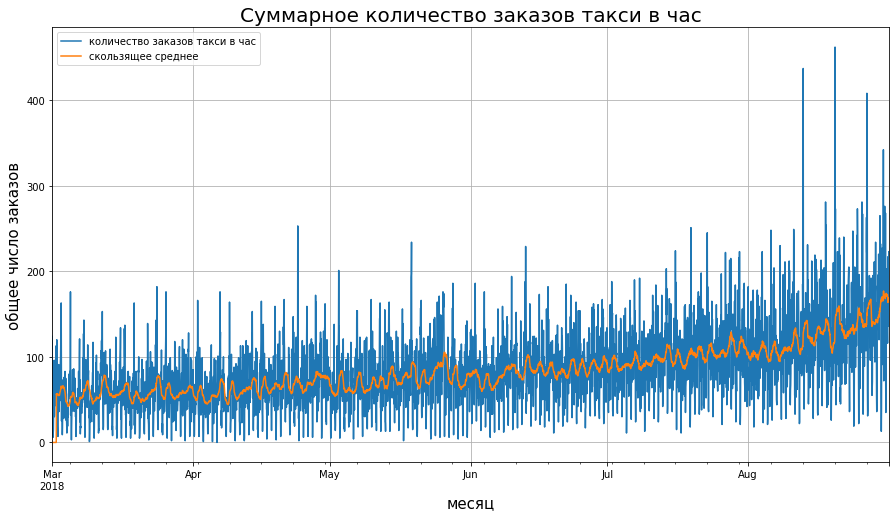

In [12]:
taxi = taxi.resample('1H').sum()
taxi.plot(grid = True, figsize = (15, 8))
plt.title('Суммарное количество заказов такси в час', fontsize = 20)
plt.xlabel('месяц', fontsize = 15)
plt.ylabel('общее число заказов', fontsize = 15)
plt.legend(['количество заказов такси в час', 'скользящее среднее'])
plt.show()

In [13]:
taxi = taxi.drop(['rolling_mean'], axis = 1)

### Тренд и сезонность

Разложим временной ряд на три составляющих - тренд, сезонность и шум:

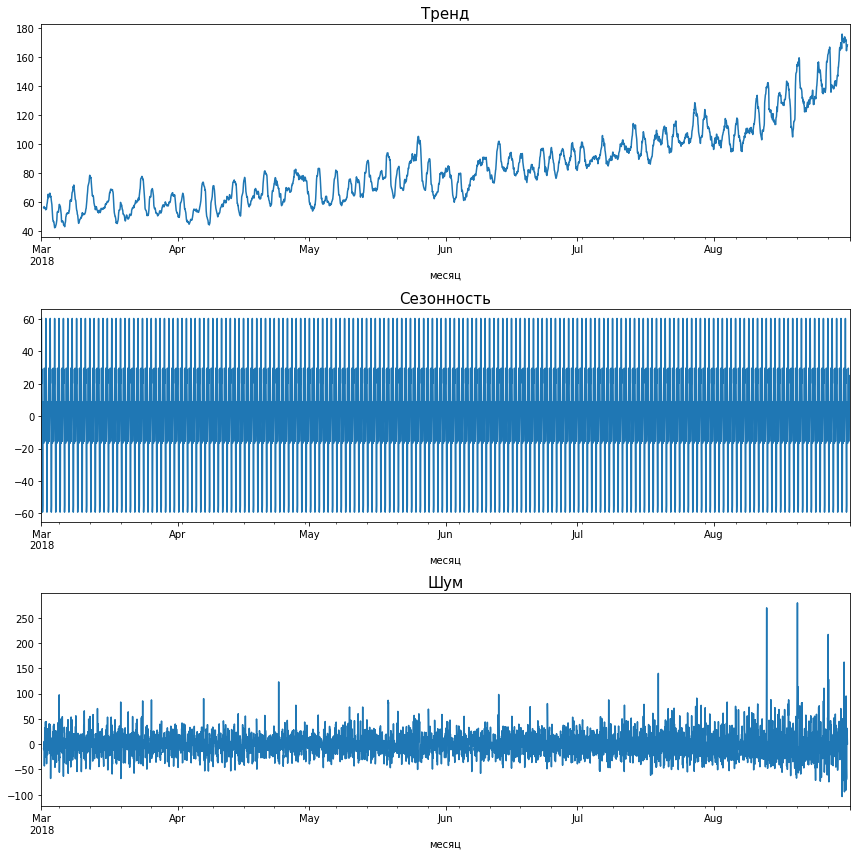

In [14]:
decomposed = seasonal_decompose(taxi)

plt.figure(figsize = (12, 12))
plt.subplot(311)
decomposed.trend.plot(ax = plt.gca(), legend = False)
plt.title('Тренд', fontsize = 15)
plt.xlabel('месяц')
plt.subplot(312)
decomposed.seasonal.plot(ax = plt.gca(), legend = False)
plt.title('Сезонность', fontsize = 15)
plt.xlabel('месяц')
plt.subplot(313)
decomposed.resid.plot(ax = plt.gca(), legend = False)
plt.title('Шум', fontsize = 15)
plt.xlabel('месяц')
plt.tight_layout()

График тренда говорит о том, количество заказов такси в час начало расти еще с апреля. График сезонной составляющей нечитаем (период слишком маленький), поэтому построим его на срезе данных:

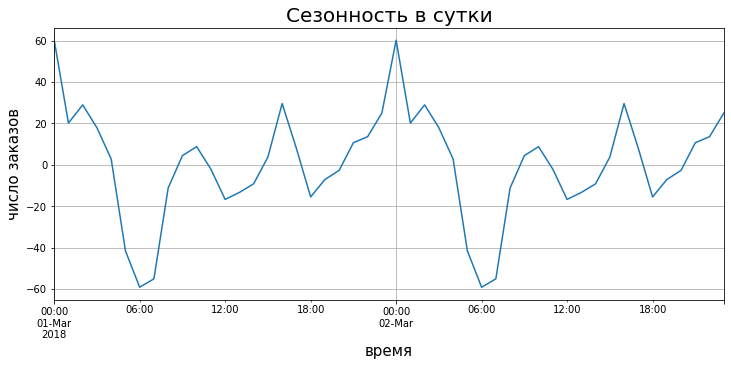

In [15]:
decomposed = seasonal_decompose(taxi)
decomposed.seasonal['2018-03-01' : '2018-03-02'].plot(figsize = (12, 5), grid = True)
plt.title('Сезонность в сутки', fontsize = 20)
plt.xlabel('время', fontsize = 15)
plt.ylabel('число заказов', fontsize = 15)
plt.show()

Пик заказов приходится на вечерние часы до полуночи, а реже всего клиенты пользуются услугами такси в 6 утра.

### Вывод

Данные ресэмплированы с интервалом в один час.

После декомпозирования временного ряда виден положительный тренд: количество заказов растет, начиная с апреля. Что касается сезонности, больше всего заказов совершается в вечерние часы до полуночи, а минимальное - в 6 утра.

## Обучение

Подготовим данные для обучения моделей: создадим признаки, разделим на тренировочную, валидационную и тестовую выборки, масштабируем, построим несколько моделей и выберем ту, на которой значение метрики RMSE будет оптимальным.

### Проверка качества модели

Рассмотрим две базовые модели для оценки качества прогнозирования - предсказание константой и предсказание новых значений предыдущими.

В качестве константы возьмем среднее число заказов такси в час:

In [16]:
train, test = train_test_split(taxi, shuffle = False, test_size = 0.1)
print("Среднее число заказов такси в час:", round(test['num_orders'].mean(), 2))
pred_mean = pd.Series(train['num_orders'].mean(), index = test.index)
print("RMSE константной модели:", round(mean_squared_error(pred_mean, test['num_orders']) ** 0.5, 2))

Среднее число заказов такси в час: 139.56
RMSE константной модели: 84.74


Предсказание новых значений предыдущими:

In [17]:
train, test = train_test_split(taxi, shuffle = False, test_size = 0.1)
print("Среднее число заказов такси в час:", round(test['num_orders'].mean(), 2))
pred_previous = test.shift(fill_value = train['num_orders'].iloc[len(train['num_orders']) - 1])
print("RMSE при предсказании предыдущими значениями:", 
      round(mean_squared_error(pred_previous, test['num_orders']) ** 0.5, 2))

Среднее число заказов такси в час: 139.56
RMSE при предсказании предыдущими значениями: 58.86


Вторая базовая модель дала лучший результат. Указанное значение метрики и будем использовать при проверке моделей на адекватность.

### Создание признаков

Напишем функцию, которая создает признаки для дальнейшего прогнозирования. В качестве календарных признаков выберем месяц, число, день недели и час. Также создадим признак "отстающего значения" (предыдущие значения временного ряда, которые покажут, будет ли функция x(t) расти или уменьшаться) и скользящего среднего:

In [18]:
def make_features(data, max_lag, rolling_mean_size):
    new_data = data.copy()
    new_data['month'] = new_data.index.month
    new_data['day'] = new_data.index.day
    new_data['dayofweek'] = new_data.index.dayofweek
    new_data['hour'] = new_data.index.hour
    
    for lag in range(1, max_lag + 1):
        new_data['lag_{}'.format(lag)] = new_data['num_orders'].shift(lag)

    new_data['rolling_mean'] = new_data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return new_data

Создадим признаки:

In [19]:
taxi_new = make_features(taxi, 5, 24)

После применения функции **make_features** из-за сдвига данных в датасете появились строки с пропущенными значениями. Заполнить их невозможно, поэтому удалим их:

In [20]:
taxi_new.shape

(4416, 11)

In [21]:
taxi_new = taxi_new.dropna()
taxi_new.shape

(4392, 11)

Удалено 24 строки (по размеру окна для скользящего среднего).

### Обучение моделей

С учётом новых признаков обучим несколько моделей:
- линейную регрессию;
- регрессию Ridge;
- регрессию Lasso;
- регрессию ElasticNet;
- дерево решений;
- случайный лес;
- CatBoost.

Выделим целевой признак:

In [22]:
target = taxi_new['num_orders']
features = taxi_new.drop('num_orders', axis = 1)

Разделим данные на обучающую, валидационную и тестовую выборки в соотношении 80:10:10.

In [23]:
features_train, features_valid, target_train, target_valid = \
                        train_test_split(features, target, test_size = 0.2, shuffle = False, random_state = 42)
features_valid, features_test, target_valid, target_test = \
                        train_test_split(features_valid, target_valid, test_size = 0.5, shuffle = False, random_state = 42)

Рассматриваемые переменные имеют разный масштаб. Чтобы модели корректно проводили оценку параметров, настроим стандартизацию на обучающей выборке:

In [24]:
scaler = StandardScaler()

scaler.fit(features_train)

for data in [features_train, features_valid, features_test]:
    data = scaler.transform(data)

Напишем функцию для подсчета метрики RMSE:

In [25]:
def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

Функция для поиска оптимального набора гиперпараметров моделей по метрике RMSE:

In [26]:
def grid_search(model, params, features, target):
    
    tscv = TimeSeriesSplit(n_splits = 5)
    g_search = GridSearchCV(model, params, cv = tscv,\
                                scoring = make_scorer(rmse_score, greater_is_better = False), n_jobs = -1)
    g_search.fit(features, target)
    
    print('Лучший набор гиперпараметров:', g_search.best_params_)
    print('Качество предсказания:', round(g_search.best_score_, 5) * (-1))
    print('Лучшая модель:', g_search.best_estimator_)
    return g_search.best_estimator_

Функция для оценки качества результатов модели и времени работы:

In [27]:
# обучает модель на тренировочной выборке и оценивает качество на тестовой, результаты записывает в таблицу.

def model_result(model, features_train, features_test, target_train, target_test, df_result):

    model.fit(features_train, target_train)
    predicted = model.predict(features_test)

    rmse_result = round(rmse_score(target_test, predicted), 3)
    print('Качество предсказания на тестовой выборке:', rmse_result)
    
    df_result.append({'model': model.__class__.__name__, 'RMSE': rmse_result})

Обучим несколько разных моделей и оценим их качество на тестовой выборке. Записывать результаты будем в отдельную таблицу.

In [28]:
result = []

#### Линейная регрессия

У линейной регрессии нет гиперпараметров, поэтому метрика качества сразу будет итоговой.

In [29]:
model_result(LinearRegression(), features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 40.556


In [30]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556


#### Ridge

В качестве гиперпараметра возьмем коэффициент регуляризации *alpha*:

In [31]:
ridge_model = Ridge(random_state = 42)
ridge_params = {'alpha' : np.arange(0.1, 100, 1)}

Найдем оптимальные гиперпараметры на тренировочной выборке:

In [32]:
ridge_best = grid_search(ridge_model, ridge_params, features_train, target_train)

Лучший набор гиперпараметров: {'alpha': 0.1}
Качество предсказания: 29.94129
Лучшая модель: Ridge(alpha=0.1, random_state=42)


In [33]:
model_result(ridge_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 40.556


In [34]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556
1,Ridge,40.556


#### Lasso

В качестве гиперпараметра снова возьмем коэффициент регуляризации *alpha*:

In [35]:
lasso_model = Lasso(random_state = 42)
lasso_params = {'alpha' : np.arange(0.1, 100, 1)}

Найдем оптимальные гиперпараметры на тренировочной выборке:

In [36]:
lasso_best = grid_search(lasso_model, lasso_params, features_train, target_train)

Лучший набор гиперпараметров: {'alpha': 0.1}
Качество предсказания: 29.95919
Лучшая модель: Lasso(alpha=0.1, random_state=42)


In [37]:
model_result(lasso_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 40.561


In [38]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556
1,Ridge,40.556
2,Lasso,40.561


#### ElasticNet

В качестве гиперпараметра в очередной раз возьмем коэффициент регуляризации *alpha*:

In [39]:
elastic_net_model = ElasticNet(random_state = 42)
elastic_net_params = {'alpha' : np.arange(0.1, 100, 1)}

Найдем оптимальные гиперпараметры на тренировочной выборке:

In [40]:
elastic_net_best = grid_search(elastic_net_model, elastic_net_params, features_train, target_train)

Лучший набор гиперпараметров: {'alpha': 0.1}
Качество предсказания: 29.96848
Лучшая модель: ElasticNet(alpha=0.1, random_state=42)


In [41]:
model_result(elastic_net_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 40.574


In [42]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556
1,Ridge,40.556
2,Lasso,40.561
3,ElasticNet,40.574


#### Модель решающего дерева

Зададим набор гиперпараметров для модели. Будем изменять глубину дерева, а также количество признаков, которые учитываются при поиске лучшего разделения:

In [43]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_params = {'max_depth' : range(1, 15, 1), 'max_features' : range(5, 11, 1)}

In [44]:
dt_best = grid_search(dt_model, dt_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 7, 'max_features': 10}
Качество предсказания: 28.42927
Лучшая модель: DecisionTreeRegressor(max_depth=7, max_features=10, random_state=42)


In [45]:
model_result(dt_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 36.155


In [46]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556
1,Ridge,40.556
2,Lasso,40.561
3,ElasticNet,40.574
4,DecisionTreeRegressor,36.155


#### Модель случайного леса

В качестве гиперпараметров будем использовать глубину дерева, а также число деревьев (для ускорения работы программы параметры уже заданы относительно близко к оптимальным; изначальный цикл пробегал глубину от 1 до 25, а число оценщиков - от 1 до 500):

In [47]:
rf_model = RandomForestRegressor(random_state = 42)
rf_params = {'max_depth' : range(19, 22, 1), 'n_estimators' : range(260, 291, 5)}

In [48]:
rf_best = grid_search(rf_model, rf_params, features_train, target_train)

Лучший набор гиперпараметров: {'max_depth': 20, 'n_estimators': 275}
Качество предсказания: 24.19252
Лучшая модель: RandomForestRegressor(max_depth=20, n_estimators=275, random_state=42)


In [49]:
model_result(rf_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 32.164


In [50]:
pd.DataFrame(result)

,model,RMSE
0,LinearRegression,40.556
1,Ridge,40.556
2,Lasso,40.561
3,ElasticNet,40.574
4,DecisionTreeRegressor,36.155
5,RandomForestRegressor,32.164


#### CatBoost

В качестве гиперпараметра выберем количество итераций (и вновь для ускорения работы начальный параметр заданы относительно близко к оптимальным):

In [51]:
catboost_model = CatBoostRegressor(random_state = 42, depth = 7, silent = True)
catboost_params = {'iterations': range(650, 751, 50)}

In [52]:
catboost_best = grid_search(catboost_model, catboost_params, features_train, target_train)

Лучший набор гиперпараметров: {'iterations': 700}
Качество предсказания: 24.47376
Лучшая модель: <catboost.core.CatBoostRegressor object at 0x7f9023dd49a0>


Оценим предсказание модели CatBoost:

In [53]:
model_result(catboost_best, features_train, features_valid, target_train, target_valid, result)

Качество предсказания на тестовой выборке: 32.477


In [54]:
pd.DataFrame(result).sort_values(by = 'RMSE')

,model,RMSE
5,RandomForestRegressor,32.164
6,CatBoostRegressor,32.477
4,DecisionTreeRegressor,36.155
0,LinearRegression,40.556
1,Ridge,40.556
2,Lasso,40.561
3,ElasticNet,40.574


### Вывод

Таким образом, лучший результат на валидационной выборке показала модель случайного леса (RMSE = 32,16). На втором месте CatBoost (32,35), на третьем - дерево решений (36,15). Все регрессионные модели показали примерно одинако низкий результат (около 40,5). Однако каждая модель отработала существенно лучше базовых.

## Тестирование

Проверим работу моделей на тестовой выборке. Для обучения используем объединение тренировочной и валидационной выборок. В качестве гиперпараметров передадим те, что давали лучший результат на предыдущем шаге.

In [55]:
features_train = pd.concat([features_train, features_valid])
target_train = pd.concat([target_train, target_valid])  

Поскольку выборки объединены, данные нужно снова стандартизировать:

In [56]:
scaler.fit(features_train) 

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test) 

In [57]:
result_test = []

In [58]:
for model in [LinearRegression(), ridge_best, lasso_best, elastic_net_best, dt_best, rf_best, catboost_best]:
    print(model.__class__.__name__)
    model_result(model, features_train, features_test, target_train, target_test, result_test)
    print('')

LinearRegression
Качество предсказания на тестовой выборке: 51.159

Ridge
Качество предсказания на тестовой выборке: 51.159

Lasso
Качество предсказания на тестовой выборке: 51.245

ElasticNet
Качество предсказания на тестовой выборке: 51.384

DecisionTreeRegressor
Качество предсказания на тестовой выборке: 55.319

RandomForestRegressor
Качество предсказания на тестовой выборке: 45.312

CatBoostRegressor
Качество предсказания на тестовой выборке: 43.457



Получили итоговую таблицу метрик на тестовой выборке:

In [59]:
pd.DataFrame(result_test).sort_values(by = 'RMSE')

,model,RMSE
6,CatBoostRegressor,43.457
5,RandomForestRegressor,45.312
0,LinearRegression,51.159
1,Ridge,51.159
2,Lasso,51.245
3,ElasticNet,51.384
4,DecisionTreeRegressor,55.319


Построим графики исходного и лучшего предсказанного ряда:

In [60]:
predicted_best = catboost_best.predict(features_test)

In [61]:
res_plot = pd.DataFrame(target_test)
res_plot['predicted'] = predicted_best

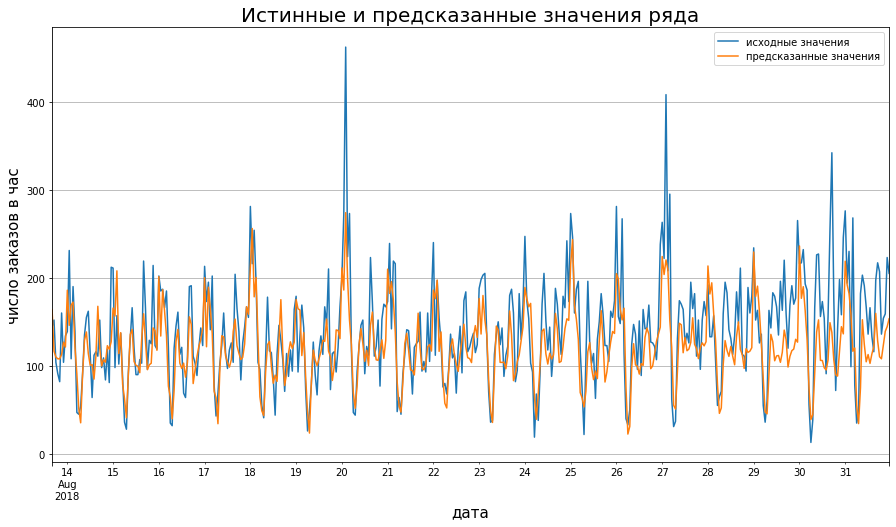

In [62]:
res_plot.plot(grid = True, figsize = (15, 8))
plt.title('Истинные и предсказанные значения ряда', fontsize = 20)
plt.xlabel('дата', fontsize = 15)
plt.ylabel('число заказов в час', fontsize = 15)
plt.legend(['исходные значения', 'предсказанные значения'])
plt.show()

### Вывод

Результаты работы моделей на тестовой выборке изменились: лучшее значение RMSE оказалось у модели CatBoost (44,78), затем у случайного леса (45,34). Результат линейных регрессий примерно одинаковый (51). Хуже всех отработало дерево решений (55,32). Однако результат каждой модели значительно выше, чем у базовых моделей предсказания константой и предыдущими значениями.

## Основные результаты

В работе решалась задача прогнозирования временного ряда - количества заказов такси на следующий час - и сравнения моделей по качеству предсказания.

В ходе анализа данных: 
- выполнен ресэмплинг с интервалом в один час;
- временной ряд декомпозирован на тренд, сезонную составляющую и шум. Тренд оказался положительным: количество заказов растет, начиная с апреля. Что касается сезонности, больше всего заказов совершается в вечерние часы до полуночи, а минимальное - в 6 утра.

Для решения задачи прогнозирования в модель добавлены следующие признаки:
- календарные (месяц, число, день недели и час);
- "отстающее значение" (предыдущие значения временного ряда, которые покажут, будет ли временная функция расти или уменьшаться);
- скользящее среднее.

Обучены и протестированы следующие модели: 
- линейная регрессия;
- Ridge;
- Lasso;
- ElaticNet;
- дерево решений;
- случайный лес;
- CatBoost.

Датасет разделен на тренировочную, валидационную и тестовую выборки в пропорции 80:10:10. Данные масштабированы. В качестве метрики использована RSME.

Для каждой модели (за исключением линейной регрессии) на валидационной выборке подбиралиись оптимальные гиперпараметры: 
- для Ridge, Lasso и ElasticNet - коэффициент регуляризации;
- для решающего дерева - глубина, а также количество признаков, учитываемых при поиске лучшего разделения;
- для случайного леса - глубина и число деревьев;
- для CatBoost - число итераций.

Лучшее значение RMSE на тестовой выборке оказалось у модели CatBoost (44,78), на втором месте случайный лес (45,34). Результат линейных регрессий примерно одинаковый (51). Хуже всех отработало дерево решений (55,32). Однако итоговая метрика каждой модели значительно выше, чем у базовых моделей предсказания константой и предыдущими значениями.